# Análise de Correpondência Simples

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_table('/content/analise2.csv', sep=';', index_col=0, header=0)
data.tail()

,Perfil de Investidor,Tipo de Aplicação Financeira
Estudante,,
Sheila,Agressivo,Ações
Pedro,Agressivo,Ações
Horácio,Agressivo,Ações
Leandro,Agressivo,Ações
Estela,Agressivo,Ações


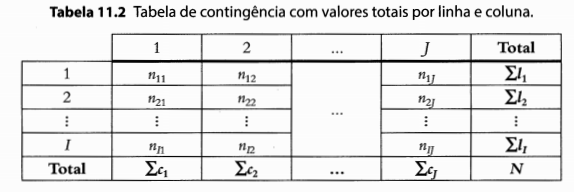

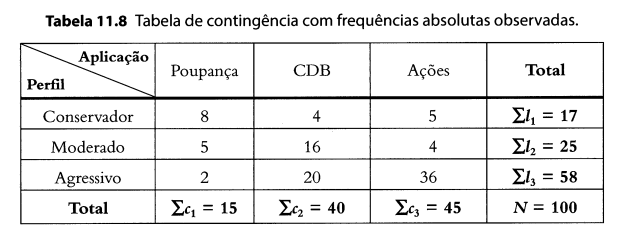

In [ ]:
contingência_margin = pd.crosstab(data['Perfil de Investidor'],data['Tipo de Aplicação Financeira'], margins= True)
contingência_margin = contingência_margin[['Poupança', 'CDB', 'Ações', 'All']]
contingência_margin = contingência_margin.reindex(['Conservador', 'Moderado', 'Agressivo', 'All'])
contingência_margin

Tipo de Aplicação Financeira,Poupança,CDB,Ações,All
Perfil de Investidor,,,,
Conservador,8,4,5,17
Moderado,5,16,4,25
Agressivo,2,20,36,58
All,15,40,45,100


In [ ]:
contingência = contingência_margin.drop(['All'], axis=1)
contingência = contingência.drop(['All'], axis=0)
contingência

Tipo de Aplicação Financeira,Poupança,CDB,Ações
Perfil de Investidor,,,
Conservador,8,4,5
Moderado,5,16,4
Agressivo,2,20,36


In [ ]:
#Matriz de Contingencia(Frequencias absolutas Observadas)
N = np.matrix(contingência, dtype=float)
N

matrix([[ 8.,  4.,  5.],
        [ 5., 16.,  4.],
        [ 2., 20., 36.]])

In [ ]:
#Soma das frequencias nas linhas
cont_sum_row = N.sum(axis=1)
cont_sum_row

matrix([[17.],
        [25.],
        [58.]])

In [ ]:
#Soma das frequencias nas colunas
cont_sum_col = N.sum(axis=0)
cont_sum_col

matrix([[15., 40., 45.]])

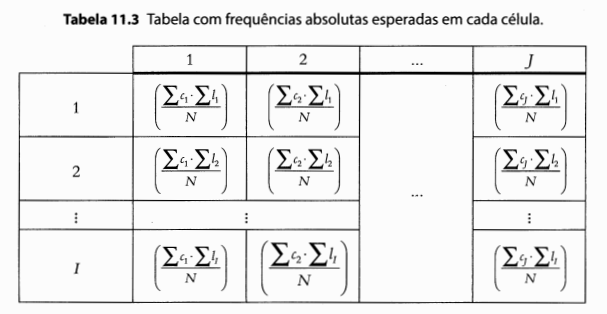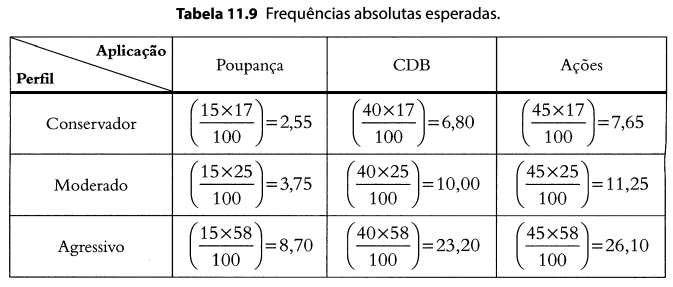

In [ ]:
#Freq absolutas esperadas
freq_abs_esp = (np.multiply(cont_sum_row,cont_sum_col))/N.sum()
freq_abs_esp

matrix([[ 2.55,  6.8 ,  7.65],
        [ 3.75, 10.  , 11.25],
        [ 8.7 , 23.2 , 26.1 ]])

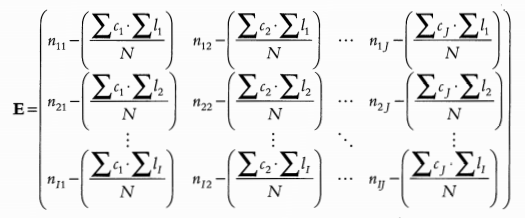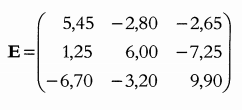

In [ ]:
#Residuos - Dif. entre freq absolutas obs. e esperadas
res = N - freq_abs_esp
res

matrix([[ 5.45, -2.8 , -2.65],
        [ 1.25,  6.  , -7.25],
        [-6.7 , -3.2 ,  9.9 ]])

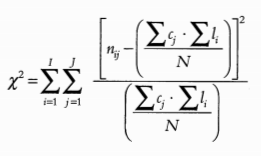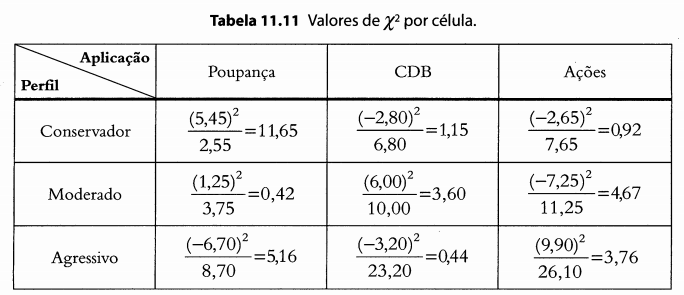

In [ ]:
#Qui Quadrado por celula
qui_cel = np.divide(np.square(res),freq_abs_esp)
np.round(qui_cel, 2)

array([[11.65,  1.15,  0.92],
       [ 0.42,  3.6 ,  4.67],
       [ 5.16,  0.44,  3.76]])

O teste qui quadrado permite avaliar se a distribuição das frequências das categorias de uma variável segundo as categorias da outra é aleatória ou se há um padrão de dependência entre as duas

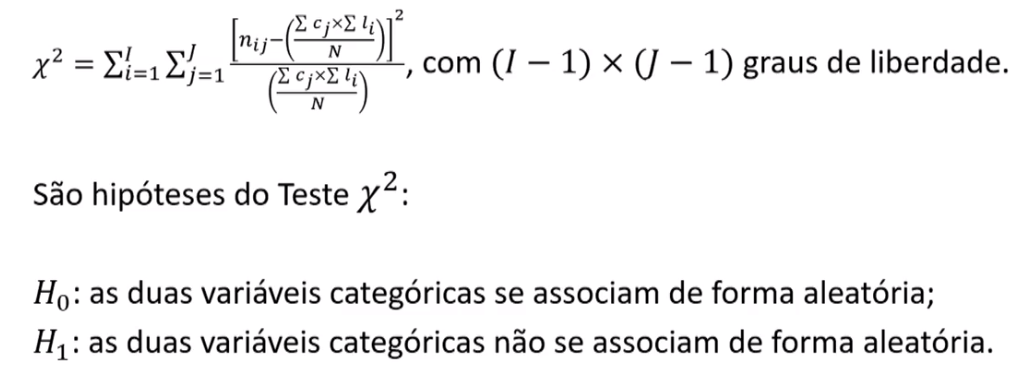

Graus de liberdade: (3-1) x (3-1) = 4 graus de liberdade


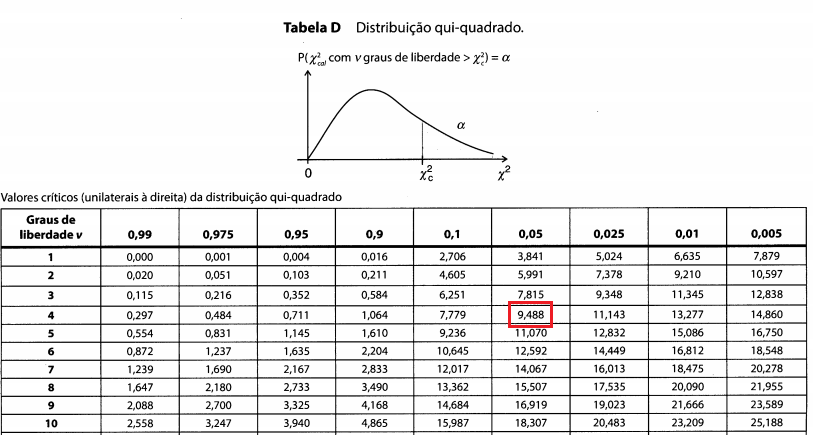

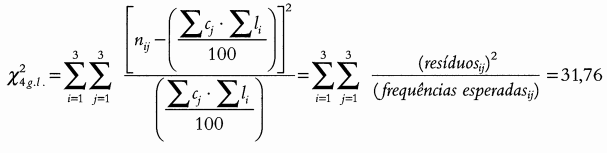

Para 4 graus de liberdade, já que (I - 1) X ( J - 1) = (3 - 1) X (3 - 1) = 4, temos, por meio da Tabela D do
apêndice do livro, que X²c = 9,488(X²c crítico para 4 graus de liberdade e para o nível de significância de 5%). Dessa
forma, como o X² calculado X²cal = 31,76 > ,X²c = 9,488, podemos rejeitar a hipótese nula de que as duas variáveis
categóricas se associam de forma aleatória, ou seja, existe associação estatisticamente significante, ao nível de significância de 5%, entre o perfil do investidor e o tipo de aplicação financeira.

In [ ]:
#Qui Quadrado total
qui_total = qui_cel.sum()
print("Valor do Qui Quadrado: {}".format(np.round(qui_total, 2)))

Valor do Qui Quadrado: 31.76


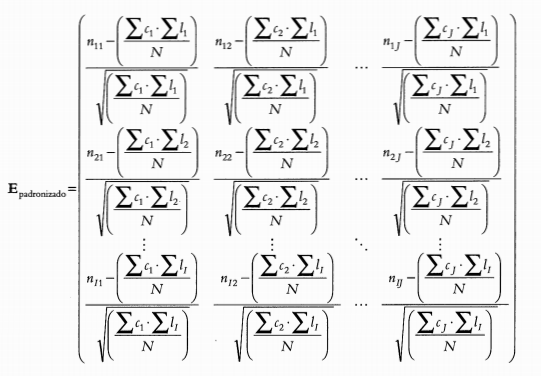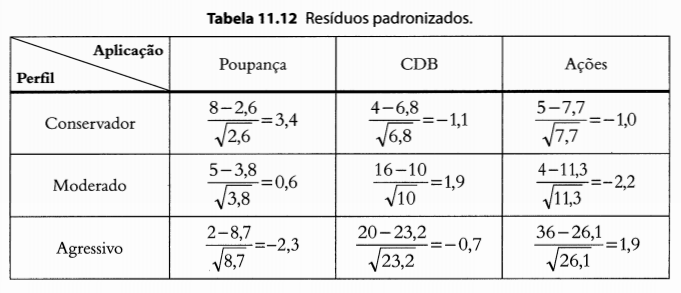

In [ ]:
#Residuos Padronizados
res_pradronizados = (res / np.sqrt(freq_abs_esp))
np.round(res_pradronizados, 1)

array([[ 3.4, -1.1, -1. ],
       [ 0.6,  1.9, -2.2],
       [-2.3, -0.7,  1.9]])

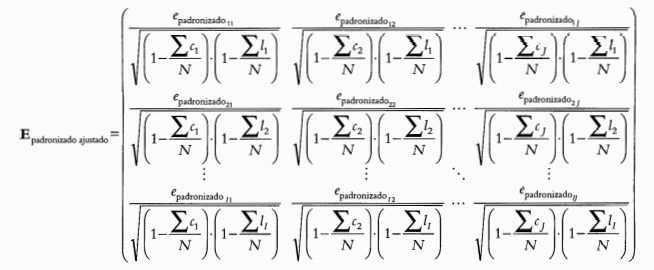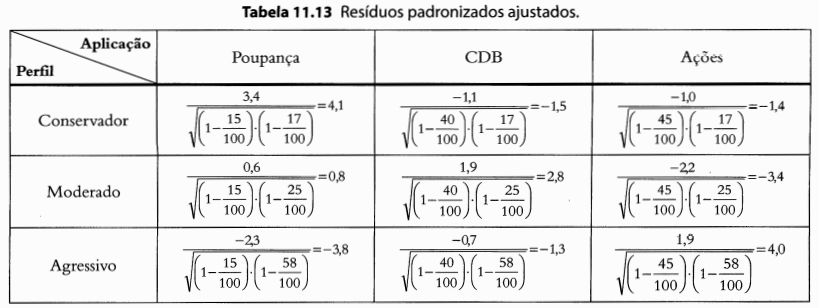

A análise dos resíduos padronizados ajustados, segundo Batista, Escuder e Pereira (2004), revela os padrões 
característicos de cada categoria de uma variável segundo o excesso ou a falta de ocorrências de sua combinação com cada categoria da outra variável.

In [ ]:
#Residuos Padronizados Ajustados

res_padro_ajust = np.divide(res_pradronizados,np.sqrt(np.multiply((1-(cont_sum_col/N.sum())),(1-(cont_sum_row/N.sum())))))
np.round(res_padro_ajust, 1)

array([[ 4.1, -1.5, -1.4],
       [ 0.8,  2.8, -3.4],
       [-3.8, -1.3,  4. ]])

## Decomposição inercial: a determinação de autovalores

Tradicionalmente, o método de decomposição de autovalores é conhecido por método Eckart-Young, em
que são gerados m autovalores, sendo m = mín(I - 1,J- 1). Se, por exemplo, determinada base de dados oferecer
uma tabela de contingência com dimensões (3 X 3), serão calculados m = 2 autovalores que, na análise de correspondência,
também são chamados de inércias principais parciais.

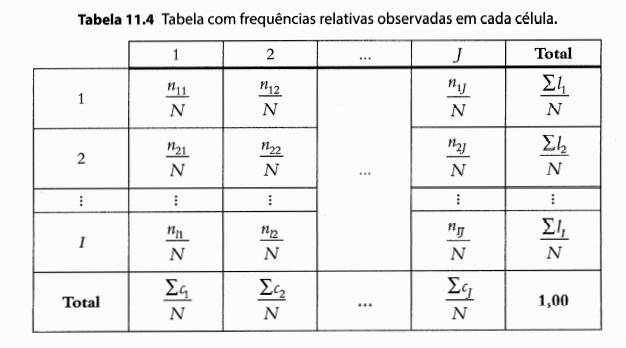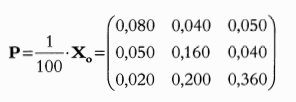

In [ ]:
#Matriz P: Tabela com frequências relativas observadas em cada célula
P = N/N.sum()
P

matrix([[0.08, 0.04, 0.05],
        [0.05, 0.16, 0.04],
        [0.02, 0.2 , 0.36]])

Com base na tabela de frequências relativas observadas (matriz P), podemos definir o conceito de massa, que
representa uma medida de influência ou preponderância de determinada categoria em relação às demais, com base
em sua frequência observada. Sendo assim, podemos determinar as massas das categorias da variável disposta em
linha e, da mesma forma, das categorias da variável disposta em coluna na tabela de contingência.

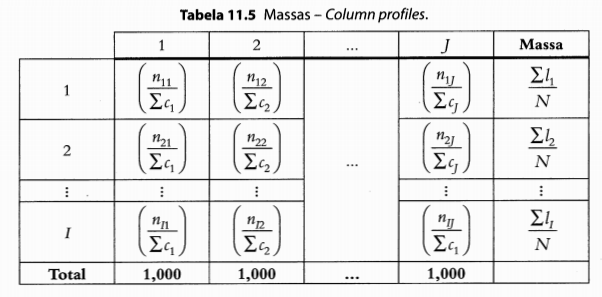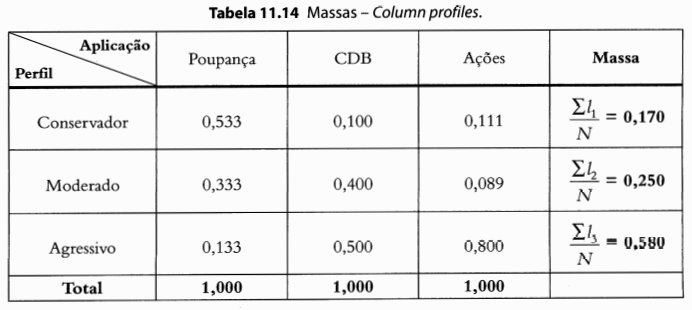

In [ ]:
#Massas Colunas
massas_colunas = np.divide(N, cont_sum_col)
np.round(massas_colunas, 3)

array([[0.533, 0.1  , 0.111],
       [0.333, 0.4  , 0.089],
       [0.133, 0.5  , 0.8  ]])

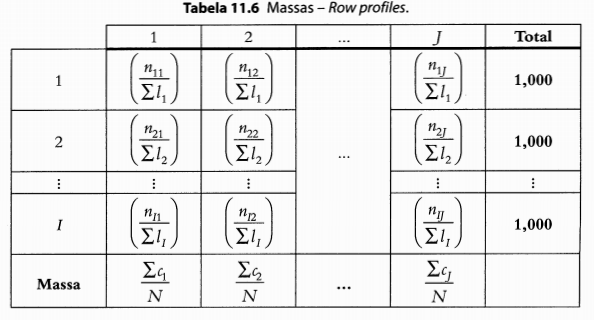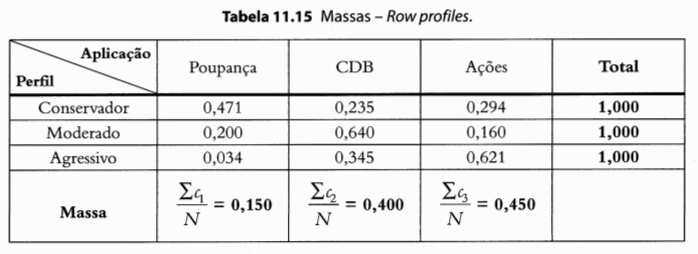

In [ ]:
#Massas Linhas
massas_linhas = np.divide(N, cont_sum_row)
np.round(massas_linhas, 3)

array([[0.471, 0.235, 0.294],
       [0.2  , 0.64 , 0.16 ],
       [0.034, 0.345, 0.621]])

Com base nos valores das massas médias em linha e em coluna, podemos definir duas matrizes diagonais, Dl
e Dc, que contêm, respectivamente, esses valores em suas diagonais principais. Sendo assim, temos que:

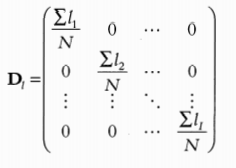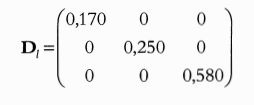

In [ ]:
#Criando Matriz Diagonal Dl
Dl = np.diagflat(cont_sum_row/N.sum())
Dl

matrix([[0.17, 0.  , 0.  ],
        [0.  , 0.25, 0.  ],
        [0.  , 0.  , 0.58]])

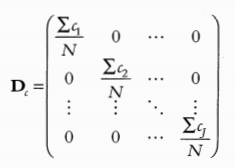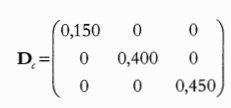

In [ ]:
#Criando Matriz Diagonal Dc
Dc = np.diagflat(cont_sum_col/N.sum())
Dc

matrix([[0.15, 0.  , 0.  ],
        [0.  , 0.4 , 0.  ],
        [0.  , 0.  , 0.45]])

Valores da diagonal principal da matriz D, são provenientes da Tabela 11.6 (row prefiles).
Segundo Johnson e Wichern (2007), a decomposição inercial para a elaboração da análise de correspondência consiste em calcular os autovalores de uma matriz W = A' . A, em que A pode ser definida da seguinte forma:

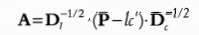

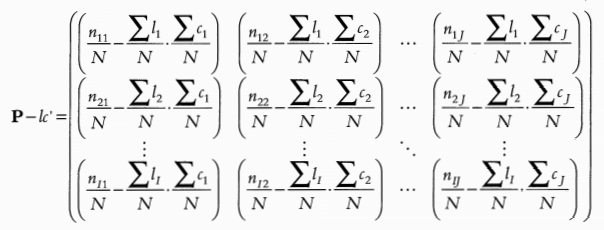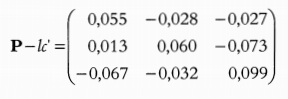

In [ ]:
#Matriz P-lc'
lc = np.multiply(cont_sum_row/N.sum(),cont_sum_col/N.sum())
P_lc = P - lc
np.round(P_lc, 3)

array([[ 0.054, -0.028, -0.027],
       [ 0.013,  0.06 , -0.073],
       [-0.067, -0.032,  0.099]])

In [ ]:
from numpy import inf
Dl_aux = np.power(Dl,(-1/2))
Dl_aux[Dl_aux == inf ] =0

Dc_aux = np.power(Dc,-1/2)
Dc_aux[Dc_aux == inf ] =0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


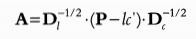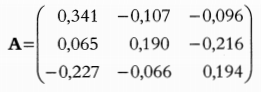

In [ ]:
#Matriz A
A = Dl_aux*P_lc*Dc_aux
np.round(A,3)

array([[ 0.341, -0.107, -0.096],
       [ 0.065,  0.19 , -0.216],
       [-0.227, -0.066,  0.194]])

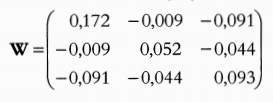

In [ ]:
W = A.T * A
np.round(W,3)

array([[ 0.172, -0.009, -0.091],
       [-0.009,  0.052, -0.044],
       [-0.091, -0.044,  0.093]])

##  Definição das coordenadas (scores) das categorias no mapa perceptual

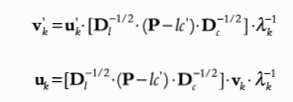

In [ ]:
#Encontrando os Eigenvalues e Eigenvectors 
from numpy import linalg as LA
from scipy.linalg import eig

w, v = LA.eig(W)

w

array([2.33214873e-01, 8.44267769e-02, 3.22218850e-18])

In [ ]:
v

matrix([[-0.82178847,  0.41792789, -0.38729833],
        [-0.09300977, -0.76899232, -0.63245553],
        [ 0.56215025,  0.48372213, -0.67082039]])

In [ ]:
u = np.empty([np.size(v, 1),1])
for i in range(np.size(v, 1)):  
  u_aux = (A*v[:,i])  
  u_aux = np.divide(u_aux,np.sqrt(w[i]))
  u = np.append(u, u_aux, 1)
 
u = np.delete(u, 0, 1)
print(np.round(u, 3))

[[-0.672  0.616 -0.   ]
 [-0.398 -0.769  0.   ]
 [ 0.625  0.172 -0.   ]]


Variável em linha na tabela de contingência (perfil do investidor):

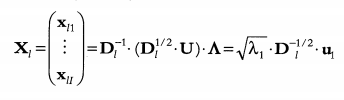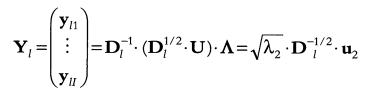

In [ ]:
 X_Y_l = np.empty([np.size(w, 0),1])
for j in range(np.size(w, 0)-1): 
  Xl_aux = np.sqrt(np.sqrt(w[j]))*Dl_aux*u[:,j]
  X_Y_l = np.append(X_Y_l, Xl_aux, 1)

X_Y_l = np.delete(X_Y_l, 0, 1)  
print(X_Y_l)

[[-1.13198672  0.80476563]
 [-0.55316381 -0.8292056 ]
 [ 0.57022189  0.12153663]]


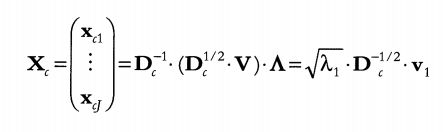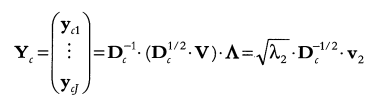

In [ ]:
 X_Y_C = np.empty([np.size(w, 0),1])
for j in range(np.size(w, 0)-1): 
  XC_aux = np.sqrt(np.sqrt(w[j]))*Dc_aux*v[:,j]
  X_Y_C = np.append(X_Y_C, XC_aux, 1)

X_Y_C = np.delete(X_Y_C, 0, 1)  
print(X_Y_C)

[[-1.47452952  0.5816688 ]
 [-0.10219688 -0.65540848]
 [ 0.58235151  0.38869572]]


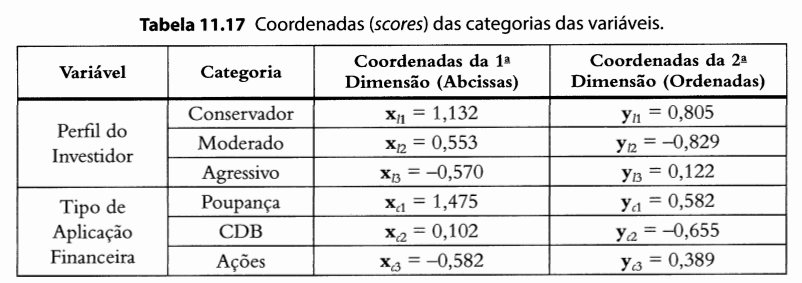

In [ ]:
#Plot pandas DF
X_append = np.append(X_Y_l, X_Y_C, 0)
plot_pandas = pd.DataFrame(data=X_append, index=contingência.index.union(contingência.columns, sort=False), columns=['Abcissas', 'Ordenadas'])
plot_pandas

,Abcissas,Ordenadas
Conservador,-1.131987,0.804766
Moderado,-0.553164,-0.829206
Agressivo,0.570222,0.121537
Poupança,-1.474530,0.581669
CDB,-0.102197,-0.655408
Ações,0.582352,0.388696


Logo, com base nas coordenadas calculadas (scores), temos, enfim, condições de construir o mapa perceptual, a
principal contribuição da análise de correspondência. A Figura 11. 9 apresenta o mapa construído por meio das
coordenadas consolidadas na Tabela 11.17. 


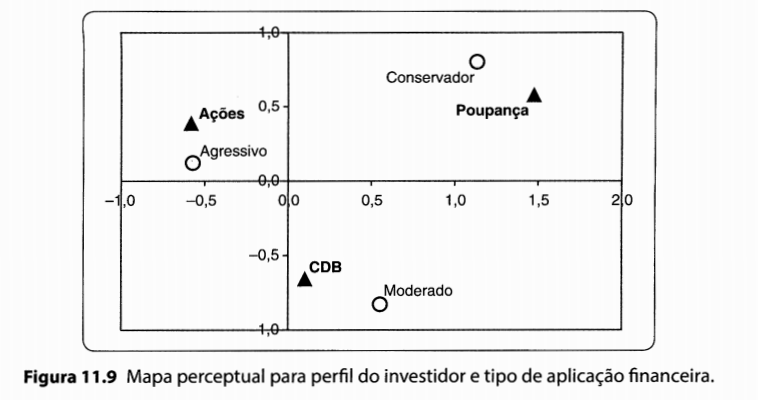

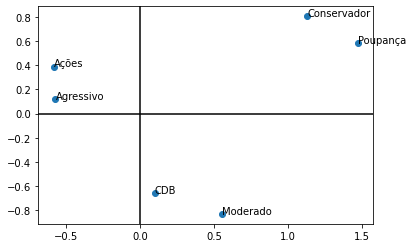

In [ ]:
import matplotlib.pyplot as plt

x = plot_pandas.Abcissas
y = plot_pandas.Ordenadas
fig, ax = plt.subplots()
ax.scatter(-x, y)

for i, txt in enumerate(plot_pandas.index):
    ax.annotate(txt, (-x[i], y[i]))

ax.axhline(y=0, color='black', linestyle='-')
ax.axvline(x=0, color='black', linestyle='-')